In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import LogNorm

In [77]:
log=pd.read_csv('./data/cfit_log.csv')

In [78]:
dim=64
xdim=dim
ydim=dim
zdim=50
f    = open('bx_ll.dat','rb')
data = np.fromfile(f, dtype=np.float64, count=zdim*dim*dim)
f.close()
bx = np.transpose(np.reshape(data,(xdim,ydim,zdim)),(1,0,2))
# by = np.transpose(np.reshape(data,(xdim,ydim,zdim)),(1,0,2))

f    = open('by_ll.dat','rb')
data = np.fromfile(f, dtype=np.float64, count=zdim*dim*dim)
f.close()
by = np.transpose(np.reshape(data,(xdim,ydim,zdim)),(1,0,2))
# bx = -np.transpose(np.reshape(data,(xdim,ydim,zdim)),(1,0,2))

f    = open('bz_ll.dat','rb')
data = np.fromfile(f, dtype=np.float64, count=zdim*dim*dim)
f.close()
bz = np.transpose(np.reshape(data,(xdim,ydim,zdim)),(1,0,2))


In [79]:
f    = open('./data/B_0004_0032.dat','rb')
data = np.fromfile(f, dtype=np.float64, count=dim*dim*dim*3)
xdim=dim
ydim=dim
zdim=dim

In [80]:
bxyz0 = np.transpose(np.reshape(data,(3,zdim,ydim,xdim)),(3,2,1,0))
bxyz=bxyz0[:,:,:50]
slopex, interceptx, r_valuex, p_valuex, std_errx = stats.linregress(bxyz[:,:,:,0].reshape(-1),bx.reshape(-1))
slopey, intercepty, r_valuey, p_valuey, std_erry = stats.linregress(bxyz[:,:,:,1].reshape(-1),by.reshape(-1))
slopez, interceptz, r_valuez, p_valuez, std_errz = stats.linregress(bxyz[:,:,:,2].reshape(-1),bz.reshape(-1))


In [81]:
xbx=np.linspace(bxyz[:,:,1:,0].min(),bxyz[:,:,:,0].max(), 50)
ybx=np.linspace(bx.min(),bx.max(), 50)
Hbx, xedges, yedges = np.histogram2d(bxyz[:,:,:,0].reshape(-1),bx.reshape(-1), bins=[xbx,ybx],density=True)
extentx=[xedges[0], xedges[-1], yedges[0], yedges[-1]]


xby=np.linspace(bxyz[:,:,:,1].min(),bxyz[:,:,:,1].max(), 50)
yby=np.linspace(by.min(),by.max(), 50)
Hby, xedges, yedges = np.histogram2d(bxyz[:,:,:,1].reshape(-1),by.reshape(-1), bins=[xby,yby],density=True)
extenty=[xedges[0], xedges[-1], yedges[0], yedges[-1]]


xbz=np.linspace(bxyz[:,:,:,2].min(),bxyz[:,:,:,2].max(), 50)
ybz=np.linspace(bz.min(),bz.max(), 50)
Hbz, xedges, yedges = np.histogram2d(bxyz[:,:,:,2].reshape(-1),bz.reshape(-1), bins=[xbz,ybz],density=True)
extentz=[xedges[0], xedges[-1], yedges[0], yedges[-1]]


Text(0.25, 0.93, 'Reconstruction Result for Sturrock Linear Force-Free Field')

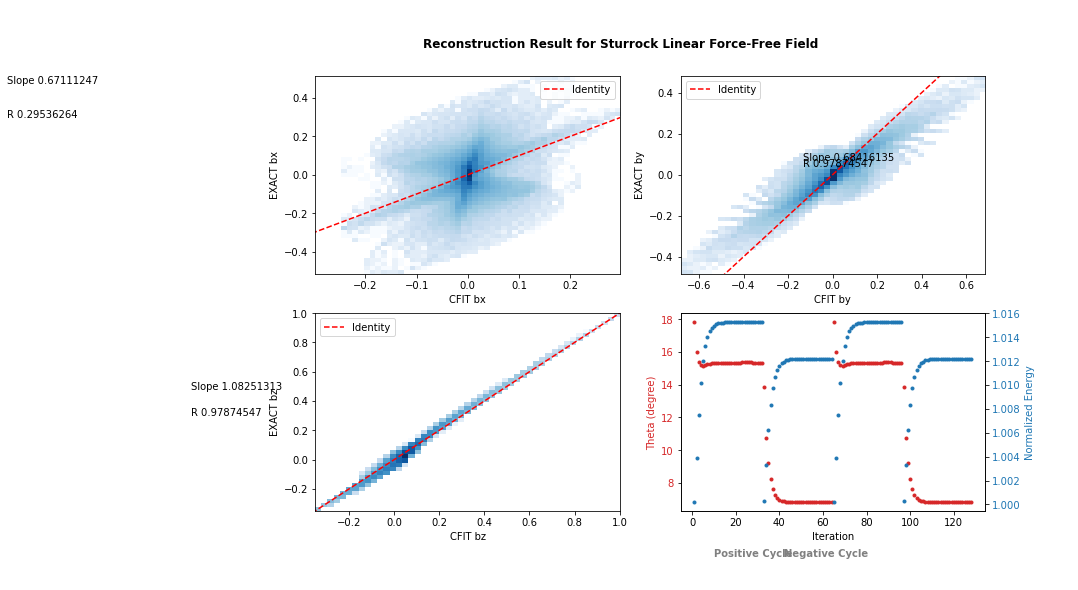

In [82]:
# ----------------- plot image -----------------
fig=plt.figure(figsize=(12,8))
# -------------------- fig 1 --------------------
plt.subplot(221)
# plt.scatter(bxyz[:,:,:,0],bx,marker='o',label='bx',alpha=0.3)
plt.imshow(Hbx.T,origin='lower',cmap='Blues',extent=extentx,label='bx',norm=LogNorm(),alpha=1,aspect='auto',interpolation='nearest')
plt.plot([-1,1],[-1,1],color='red',linestyle='dashed',label='Identity')

plt.xlim([bxyz[:,:,:,0].min(),bxyz[:,:,:,0].max()])
plt.ylim([bx.min(),bx.max()])

plt.legend()
plt.xlabel('CFIT bx')
plt.ylabel('EXACT bx')
plt.text(-0.9,0.475,'Slope '+"{:.8f}".format(slopex))
plt.text(-0.9,0.3,'R '+"{:.8f}".format(r_valuex))

# -------------------- fig 2 --------------------
plt.subplot(222)
# plt.scatter(bxyz[:,:,:,1],by,marker='o',label='by',alpha=0.3)
plt.imshow(Hby.T,origin='lower',cmap='Blues',extent=extenty,label='by',norm=LogNorm(),alpha=1,aspect='auto',interpolation='nearest')
plt.plot([-1,1],[-1,1],color='red',linestyle='dashed',label='Identity')

plt.xlim([bxyz[:,:,:,1].min(),bxyz[:,:,:,1].max()])
plt.ylim([by.min(),by.max()])

plt.legend()
plt.xlabel('CFIT by')
plt.ylabel('EXACT by')
plt.text(-0.135,0.0675,'Slope '+"{:.8f}".format(slopey))
plt.text(-0.135,0.0405,'R '+"{:.8f}".format(r_valuez))

# -------------------- fig 3 --------------------
plt.subplot(223)
# plt.scatter(bxyz[:,:,:,2],bz,marker='o',label='bz',alpha=0.3)
plt.imshow(Hbz.T,origin='lower',cmap='Blues',extent=extentz,label='bz',norm=LogNorm(),alpha=1,aspect='auto',interpolation='nearest')
plt.plot([-1,1],[-1,1],color='red',linestyle='dashed',label='Identity')

plt.xlim([bxyz[:,:,:,2].min(),bxyz[:,:,:,2].max()])
plt.ylim([bz.min(),bz.max()])

plt.legend()
plt.xlabel('CFIT bz')
plt.ylabel('EXACT bz')
plt.text(-0.9,0.475,'Slope '+"{:.8f}".format(slopez))
plt.text(-0.9,0.3,'R '+"{:.8f}".format(r_valuez))

# -------------------- fig 4 --------------------
ax1=plt.subplot(224)
color = 'tab:red'
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Theta (degree)',color=color)
ax1.plot(log.iter,log.theta,'.',color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.text(10,3.5,'Positive Cycle',fontsize=10,color='gray',weight='bold')
ax1.text(42,3.5,'Negative Cycle',fontsize=10,color='gray',weight='bold')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Normalized Energy', color=color)
ax2.plot(log.iter, log.energy,'.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3=plt.axes([0,0,1,1], projection=None)
ax3.axis('off')
ax3.text(0.25, 0.93, "Reconstruction Result for Sturrock Linear Force-Free Field", fontsize='large', color='black',weight='bold')

# plt.savefig('check_result.pdf',dpi=512)
# plt.close()
